# Confidence Intervals

Let's start with the notion of a [z-table](http://z-table.com).

In [1]:
import numpy as np
from scipy import stats
import random
from matplotlib import pyplot as plt
%matplotlib inline

Because sample statistics are imperfect representations of the true population values, it is often appropriate to state these estimates with **confidence intervals**.

Suppose I weigh a sample of 50 jellybeans from a population of 10000 and find the average weight to be 1.25 grams. Can I take this figure to be a good estimate of the average weight over the whole *population* of jelly beans?

In a word, yes. (What else do I have to go on!?) But what I want now is a more or less precise way of indicating that this figure, though likely close to the real population mean, is inexact.

Natural idea: I'll say I'm confident that the real population value lies in some neighborhood or *interval* around the figure I obtained for my sample.

Notice that:

- The larger my sample, the more confident I may be about the sample's representativeness for the whole population;
- The larger I make the interval, the more confident I may be about the true population value falling within it.

## Interpretation

Here's another example: Suppose our Indian correspondent (or David Attenborough) takes several hundred measurements of parrot beak lengths in the Ganges river basin and calculates (correctly!) an average beak length of 9cm. He reports this measure by saying that the 90%-confidence interval is (8.6, 9.4).

This does NOT mean that the true population mean beak length has a 90% chance of being somewhere between 8.6cm and 9.4cm. After all, the true mean either falls in that range or it doesn't. The notion of probability *here* doesn't seem to make much sense. Rather, what our correspondent means is that, if we were to conduct the same measuring experiment many times, constructing intervals in the same way, we should expect 90% of those intervals to contain the true population mean.

## Construction

OK: So how do we construct these intervals?

The confidence interval we construct will depend on the statistics of our sample. It will depend in particular on (i) our sample mean and (ii) our sample size.

It will also depend on the underlying distribution of our data. If our data are **normally** distributed, then we can proceed as follows:

Naturally, the confidence interval will be centered on our sample mean. To construct the endpoints we step out from the center with a step size equal to the standard error, $\large\frac{\sigma}{\sqrt{n}}$. The number of steps we take is determined by which level of confidence we want attached to our interval: In particular, we take $z$-many steps, where $z$ is the (two-tailed) z-score that corresponds to our chosen level of confidence.

If our data are **not** normally distributed, then there are several strategies we might try, some of which ultimately depend on some connection to the normal distribution, like a strategy that appeals to the Central Limit Theorem.

## CIs for Normally Distributed Data

Let's look at an example with data we assume to be normally distributed:

In [4]:
# A normally distributed variable with a
# population size of 1000
np.random.seed(42)
pop = list(stats.norm.rvs(size=1000))

In [5]:
# Let's calculate the population mean.

np.mean(pop)

0.01933205582232549

In [6]:
# And the population standard deviation.

pop_std = np.std(pop)
pop_std

0.9787262077473543

Let's say we take a sample of ten from our population, and that we want an 80%-confidence interval for our estimate of the population mean. The z-score that corresponds to an 80%-confidence interval is:

In [7]:
z = stats.norm.ppf(0.9)
#Why do we want 0.9 here? 
z
# what does the z score mean? how many standard deviations z is from the mean

1.2815515655446004

In [14]:
sample = random.sample(pop, 10)
np.mean(sample)

-0.09670838801086663

In [15]:
pop_std / np.sqrt(10) * z

0.3966407249992607

## CIs for Non-Normally Distributed Data

One of the most commonly used strategies for dealing with non-normally distributed data is to find a way to reduce the problem to one that involves normally distributed data!

[Here](https://file.scirp.org/Html/3-1240887_76758.htm) is a review article that compares several different strategies. (Note that it ultimately recommends a sort of Bayesian method. We'll get to Bayesian reasoning in a later lesson.)

## T-Distribution

![imgguiness](./img/guiness.png)

We can use the normal distribution when either:
* the population standard deviation is known
* the sample size is greater than 100.

If **neither** of those holds true, we need to use the **T-distribution**. The t-distribution is wider and has different critical values for different sample sizes.


PDF of T-distribution: ${\frac {\Gamma \left({\frac {\nu +1}{2}}\right)}{{\sqrt {\nu \pi }}\,\Gamma \left({\frac {\nu }{2}}\right)}}\left(1+{\frac {x^{2}}{\nu }}\right)^{-{\frac {\nu +1}{2}}}\!$, where $\Gamma$ denotes the [Gamma Function](https://en.wikipedia.org/wiki/Gamma_function).

parameter: $\nu > 0$ where $\nu$ is degrees of freedom (n-1)

**T distribution becomes closer to Z distribution as n increases**
![zvt](./img/z_vs_t.png)

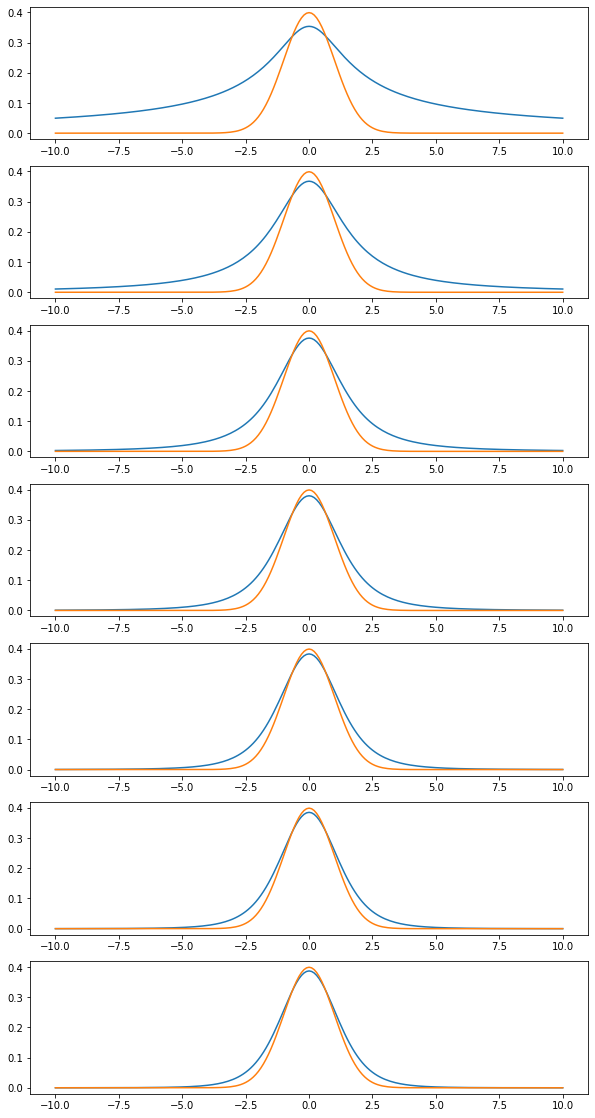

In [16]:
from math import gamma

fig, ax = plt.subplots(7, figsize=(10, 20))

X = np.linspace(-10, 10, 201)
nus = np.arange(2, 9)
y_norm = 1 / np.sqrt(2*np.pi) * np.exp(-0.5 * X**2)

for j in range(7):
    y = gamma((nus[j]+1) / 2) / (np.sqrt(np.pi*nus[j]) * gamma(nus[j] / 2)) *\
(1 + X**2/nus[j])**((-nus[j]+1) / 2)
    ax[j].plot(X, y)
    ax[j].plot(X, y_norm);

## CIs for T-Distribution

The construction of confidence intervals for the t-Distribution is similar to how they are made for the normal distribution. But instead of z-scores, we'll have t-scores. And since we don't have access to the population standard deviation, we'll make use of the sample standard deviation instead.

left endpt.: $\bar{x} - t\times\frac{s}{\sqrt{n}}$ <br/>
right endpt.: $\bar{x} + t\times\frac{s}{\sqrt{n}}$

### T-Distribution Example

You are inspecting a hardware factory and want to construct a 90% confidence interval of acceptable screw lengths. You draw a sample of 30 screws and calculate their mean length as 4.8 centimeters and the standard deviation as 0.4 centimeters. What are the bounds of your confidence interval?

In [17]:
n = 30
mean = 4.8
t_value = stats.t.ppf(0.95, n-1)
margin_error = t_value * 0.4/(n**0.5)
confidence_interval = (mean - margin_error, mean + margin_error)

confidence_interval

(4.6759133066001235, 4.924086693399876)

In [24]:
# Your turn!
n = 100
x_bar = 2000
s = 200

t_value80 = stats.t.ppf(0.9, n-1)
t_value70 = stats.t.ppf(0.85, n-1)

margin_error80 = t_value80 * s/(n**0.5)
margin_error70 = t_value70 * s/(n**0.5)

confidence_int80 = (x_bar - margin_error80, mean + margin_error80)
confidence_int70 = (x_bar - margin_error70, mean + margin_error70)

z_score80 = stats.norm.ppf(0.9)
z_score70 = stats.norm.ppf(0.85)


error_norm80 = z_score80 * (s/n**0.5)
error_norm70 = z_score70 * (s/n**0.5)

conf_norm80 = (x_bar - error_norm80, x_bar + error_norm80)
conf_norm70 = (x_bar - error_norm70, x_bar + error_norm70)



# You're weighing walruses in the Arctic in the attempt to estimate
# the mean weight of the Canadian walrus population. You have a sample
# of 100 walrus weights. The mean of the sample is 2000 lbs. and the
# standard deviation is 200 lbs. Calculate the 80%-confidence interval.
# Calculate the 70%-confidence interval. How do they compare to the
# normal-distribution CIs? (To calculate the latter, just use the 
# sample standard deviation.)




## Binomial Distribution

What if we have a binomial distribution? Suppose we have the following sample statistic:

A survey of 3000 voters found that 1245 approved of the job the governor was doing. How can we express our 95%-confidence level about voter approval of the governor among _all_ voters?

To solve this, we'll once again start with our sample proportion as the center of our CI and step out from it by an amount proportional to the relevant z-score.

But by how much exactly? Forgoing the [proof](https://newonlinecourses.science.psu.edu/stat414/node/208/), the answer *for suitably large samples* (we're relying here on the Central Limit Theorem) is as follows:

left endpt.: $\hat{p} - z\times\sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}$ <br/>
right endpt.: $\hat{p} + z\times\sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}$

Let's answer our original question about the voters:

We have:

- $\hat{p} = \frac{1245}{3000} = 0.415$;
- $n = 3000$;
- $z = 1.96$.

Therefore:

In [25]:
p_hat = 0.415
n = 3000
z_voters = stats.norm.ppf(0.975)
step = z_voters * np.sqrt(p_hat * (1-p_hat) / n)

interval = (p_hat - step, p_hat + step)
interval

(0.3973684925470148, 0.4326315074529852)

## CIs for Other Parameters

We might be interested in constructing confidence intervals for other parameters, such as the variance. [This online course](https://newonlinecourses.science.psu.edu/stat414/) has several good examples.

## A Visual Interpretation of Confidence Intervals

Let's see if we can get an idea of how confidence intervals work by constructing a plot:

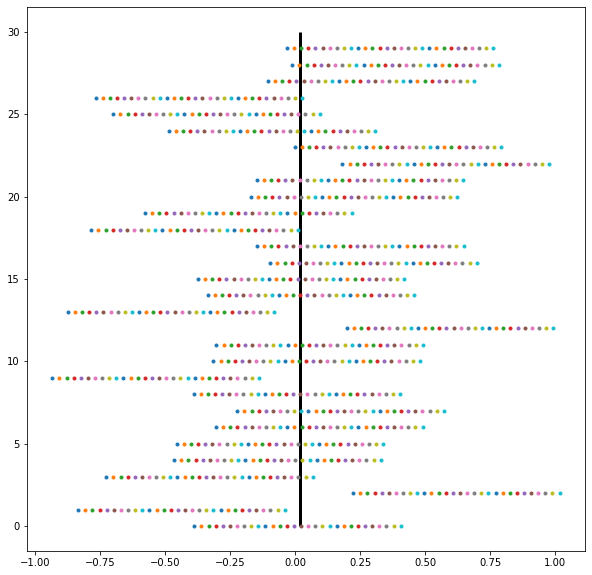

In [28]:
# Plotting CIs

intervals = []
for _ in range(30): # number of intervals
    sample = random.sample(pop, 10) # sample size = 10
    step = np.std(pop) / np.sqrt(10) # standard error
    x_min = np.mean(sample) - step * z # left endpt. of interval
    x_max = np.mean(sample) + step * z # right endpt. of interval
    intervals.append(np.linspace(x_min, x_max, 30)) # add interval
                                                    # to intervals
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(intervals, range(30), '.') # plot intervals evenly and
                                    # vertically
ax.vlines(np.mean(pop), 0, 30, lw=3);

In [29]:
# Exercise: turn this into a function that takes as parameters:
# - the population
# - sample size
# - no. of samples / confidence intervals to plot
# - confidence level

  
def ci_plotter(pop, sample_size, num_samples, conf):
    from scipy import stats
    intervals = []
for _ in range(num_samples): # number of intervals
    sample = random.sample(pop, sample_size) # sample size = 10
    step = np.std(pop) / np.sqrt(sample_size) # standard error
    semi_int_size = step * stats.norm.ppf(1 -(1-conf/2))
    
    x_min = np.mean(sample) - semi_int_size # left endpt. of interval
    x_max = np.mean(sample) + semi_int_size # right endpt. of interval
    intervals.append(np.linspace(x_min, x_max, 30)) # add interval
                                                    # to intervals
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(intervals, range(num_samples), '.') # plot intervals evenly and
                                    # vertically
ax.vlines(np.mean(pop), 0, num_samples, lw=3);  

NameError: name 'num_samples' is not defined